In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

##plotting modules
import seaborn as sns

In [2]:
%matplotlib inline

##### Set General Parameters

In [3]:
MFr_O2 = 0.2095 #Molar fraction of O2 in ambient air
MR_O2_In = 0.265 #Molar ratio O2/Inerts (Inerts are CO2, N2 and all other components having a fized conc in ambient)
Patm_ref = 1013.25 #Reference ambient pressure
DOss_20 = 9.08 #Referene DO saturation concentration at 20 deg C
tetha = 1.024 #for temperature adjustm

Vel_BaseScale = 2 #base scale velocity for anemomenter reading 
Eo = 1
Efs = 2 #Param of anemometer 

Tube_diam = 0.0381 #diameter of tube driving the off-gas throught the anemomenter
Tube_area = np.pi*(Tube_diam/2)**2

#Points = 9 #Number of points on the tank

#### This notebook helps in managing data from the old DICEA off-gas analyzer

##### Insert path to data files

In [4]:
os.chdir(r'../data/analyzer/')

In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 60EB-7EB4

 Directory of C:\Users\bella\Documents\GitHub\Pyhon_basicsCourse\data\analyzer

16-Apr-20  11:45 AM    <DIR>          .
16-Apr-20  11:45 AM    <DIR>          ..
22-Nov-16  11:36 AM           125,480 test_16-11-22_1134_001
22-Nov-16  11:40 AM           144,480 test_16-11-22_1137_001
22-Nov-16  11:45 AM           174,120 test_16-11-22_1141_001
22-Nov-16  12:41 PM         2,207,040 test_16-11-22_1153_001
22-Nov-16  01:07 PM           658,240 test_16-11-22_1253_001
22-Nov-16  01:27 PM           750,200 test_16-11-22_1311_001
22-Nov-16  02:38 PM         2,979,240 test_16-11-22_1334_001
22-Nov-16  02:59 PM           696,240 test_16-11-22_1444_001
22-Nov-16  03:20 PM           801,480 test_16-11-22_1502_001
22-Nov-16  03:36 PM           193,880 test_16-11-22_1532_001
22-Nov-16  03:57 PM           193,880 test_16-11-22_1553_001
22-Nov-16  04:23 PM           193,880 test_16-11-22_1619_001
22-Nov-16  05:11 PM           193,880 tes

In [6]:
path = os.getcwd()

In [7]:
file_names = []
data_frames = []

for filename in os.listdir(path):
    name = os.path.splitext(filename)[0]
    file_names.append(name)
    df = pd.read_csv(path + '//' + filename, delimiter='\t', sep='.', header=None)
    df.rename(columns={0: 'Time (s)', 1: name + ' Flow (v)', 2: name + ' O2 (v)', 3: name + ' Press (v)'}, inplace=True)
    data_frames.append(df)

combined = pd.concat(data_frames, axis=1)
combined = combined.T.groupby(level=0).first().T

##### Separate O2 and Air flow V signal data frame

In [8]:
combined_clean = combined.set_index(['Time (s)'], drop=True)
O2v = combined_clean[[col for col in combined_clean.columns if 'O2' in col]]
Flowv = combined_clean[[col for col in combined_clean.columns if 'Flow' in col]]
#Presv = combined_clean[[col for col in combined_clean.columns if 'Press' in col]] #not in use

##### Control the status of the txt files present in the folder for O2 signal

<Figure size 432x288 with 0 Axes>

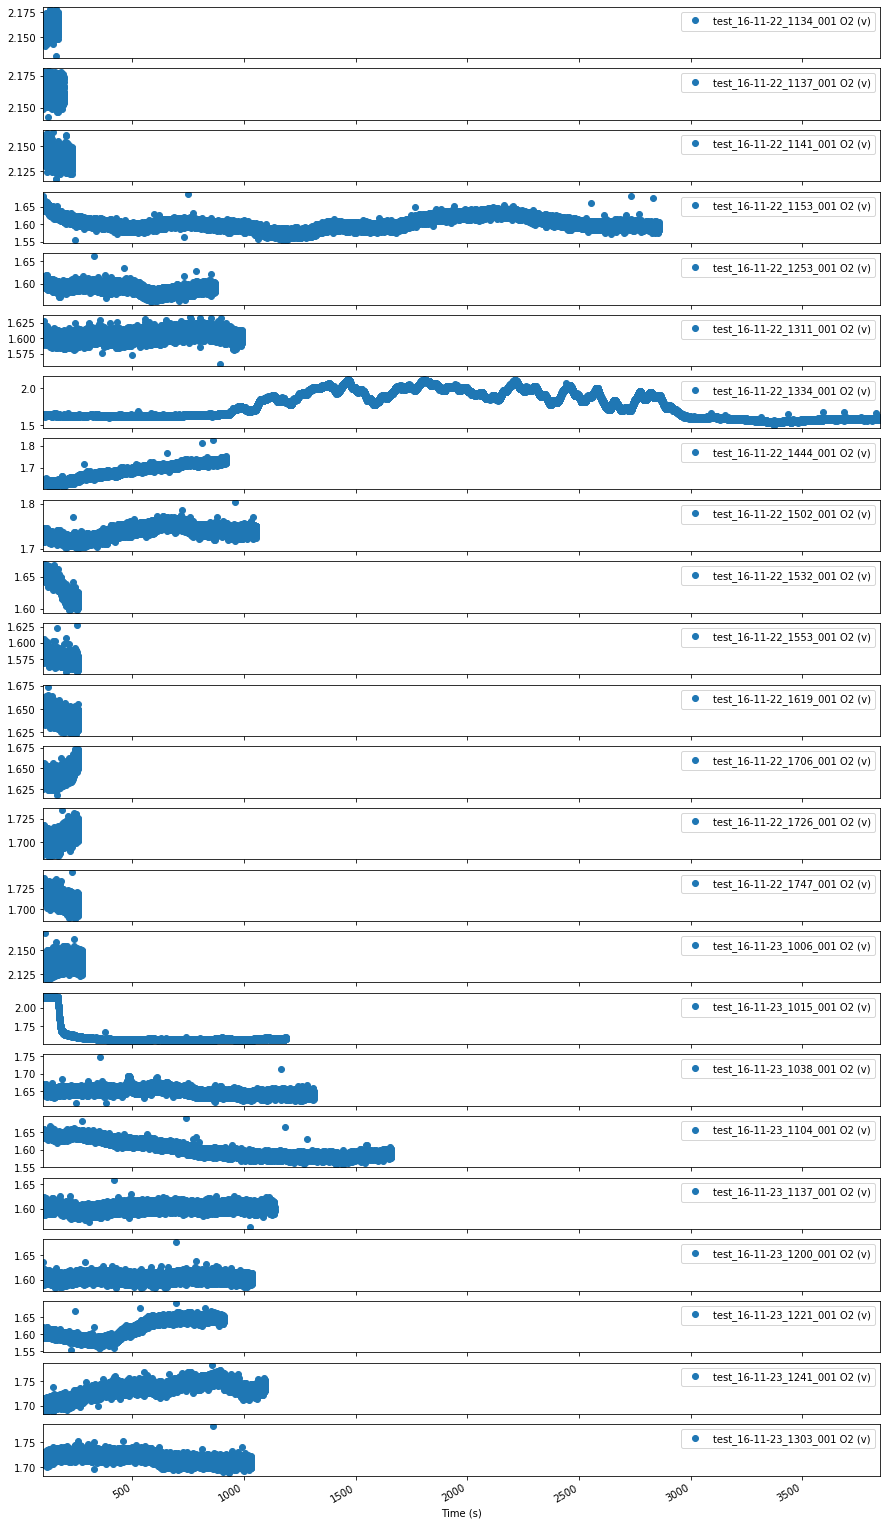

In [9]:
plt.figure();
O2v[100:].plot(subplots=True, figsize=(15, 30), style='o');

##### O2 stats

In [10]:
O2v_stats = []
for f in file_names:
    df = pd.DataFrame.describe(pd.DataFrame(O2v[f + ' O2 (v)'][100:])) # length set to [100:] to skip sensor stabilization
    O2v_stats.append(df)
O2v_stats = pd.concat(O2v_stats, axis=1)

##### Air flow stats

In [11]:
Flowv_stats = []
for f in file_names:
    df = pd.DataFrame.describe(pd.DataFrame(Flowv[f + ' Flow (v)'][100:])) #air flow does not need stabilization time but we use the same as for O2sensor
    Flowv_stats.append(df)
Flowv_stats = pd.concat(Flowv_stats, axis=1)

##### Check visually O2 and Flow statistics for each file

In [12]:
O2v_stats

,test_16-11-22_1134_001 O2 (v),test_16-11-22_1137_001 O2 (v),test_16-11-22_1141_001 O2 (v),test_16-11-22_1153_001 O2 (v),test_16-11-22_1253_001 O2 (v),test_16-11-22_1311_001 O2 (v),test_16-11-22_1334_001 O2 (v),test_16-11-22_1444_001 O2 (v),test_16-11-22_1502_001 O2 (v),test_16-11-22_1532_001 O2 (v),...,test_16-11-22_1747_001 O2 (v),test_16-11-23_1006_001 O2 (v),test_16-11-23_1015_001 O2 (v),test_16-11-23_1038_001 O2 (v),test_16-11-23_1104_001 O2 (v),test_16-11-23_1137_001 O2 (v),test_16-11-23_1200_001 O2 (v),test_16-11-23_1221_001 O2 (v),test_16-11-23_1241_001 O2 (v),test_16-11-23_1303_001 O2 (v)
count,1360.000000,1860.000000,2640.000000,55160.000000,15380.000000,17800.000000,74960.000000,16380.000000,19120.000000,3160.000000,...,3180.000000,3540.000000,21740.000000,24240.000000,31200.000000,20740.000000,18740.000000,16180.000000,19860.000000,18640.000000
mean,2.158417,2.163606,2.139075,1.602582,1.588917,1.604124,1.767546,1.684069,1.736840,1.633193,...,1.711104,2.137410,1.609175,1.647315,1.601420,1.601178,1.603286,1.616002,1.733618,1.718173
std,0.006759,0.006311,0.007101,0.017114,0.009503,0.007449,0.169738,0.032586,0.013262,0.017222,...,0.007652,0.006673,0.144710,0.009879,0.023572,0.007066,0.006449,0.027336,0.015257,0.009144
min,2.131539,2.142384,2.117294,1.553820,1.558029,1.558515,1.499108,1.610961,1.700152,1.597040,...,1.688659,2.118589,1.533101,1.614684,1.555924,1.562723,1.582633,1.554144,1.688659,1.688497
25%,2.153230,2.158571,2.133481,1.590889,1.582795,1.598659,1.622454,1.659522,1.727346,1.617598,...,1.705493,2.132186,1.557381,1.640259,1.581986,1.596231,1.598335,1.590079,1.724918,1.711321
50%,2.157924,2.163589,2.138823,1.599792,1.589270,1.603838,1.720709,1.688659,1.737382,1.634270,...,1.710997,2.137043,1.565313,1.646896,1.592507,1.600924,1.602867,1.613874,1.735278,1.718281
75%,2.163751,2.168283,2.144327,1.613874,1.595907,1.609342,1.924181,1.712495,1.746771,1.648191,...,1.716501,2.142384,1.578101,1.653695,1.621482,1.606266,1.608047,1.642364,1.744504,1.724756
max,2.178158,2.178967,2.163913,1.686878,1.663083,1.634432,2.126521,1.823659,1.803426,1.670368,...,1.744343,2.167960,2.178319,1.748065,1.689792,1.658713,1.677166,1.690278,1.783678,1.781250


In [13]:
xlabels = []
for k in range(O2v.columns.shape[0]): 
    xlabels = np.append(xlabels, O2v.columns[k][5:18])
xlabels = xlabels.tolist()

In [14]:
O2v

,test_16-11-22_1134_001 O2 (v),test_16-11-22_1137_001 O2 (v),test_16-11-22_1141_001 O2 (v),test_16-11-22_1153_001 O2 (v),test_16-11-22_1253_001 O2 (v),test_16-11-22_1311_001 O2 (v),test_16-11-22_1334_001 O2 (v),test_16-11-22_1444_001 O2 (v),test_16-11-22_1502_001 O2 (v),test_16-11-22_1532_001 O2 (v),...,test_16-11-22_1747_001 O2 (v),test_16-11-23_1006_001 O2 (v),test_16-11-23_1015_001 O2 (v),test_16-11-23_1038_001 O2 (v),test_16-11-23_1104_001 O2 (v),test_16-11-23_1137_001 O2 (v),test_16-11-23_1200_001 O2 (v),test_16-11-23_1221_001 O2 (v),test_16-11-23_1241_001 O2 (v),test_16-11-23_1303_001 O2 (v)
Time (s),,,,,,,,,,,,,,,,,,,,,
0.000000,0.114785,0.321818,0.265648,0.084029,0.081763,0.077554,0.093579,0.087428,0.094227,0.076907,...,0.069946,0.064604,0.063148,0.077716,0.077878,0.081115,0.069299,0.075126,0.067356,0.090018
0.050000,0.099407,0.318742,0.268562,0.104587,0.077878,0.082896,0.084029,0.086619,0.088562,0.085000,...,0.078687,0.070755,0.074964,0.066547,0.079497,0.087590,0.078687,0.073184,0.085486,0.079982
0.100000,0.103777,0.324570,0.269210,0.080791,0.084838,0.084838,0.088238,0.092446,0.106043,0.071403,...,0.075450,0.060882,0.072536,0.075288,0.064928,0.081763,0.067356,0.075612,0.080468,0.081925
0.150000,0.095522,0.337843,0.260307,0.098274,0.084353,0.094065,0.079497,0.089694,0.092446,0.066385,...,0.079173,0.081115,0.083705,0.063148,0.072698,0.071079,0.084029,0.070755,0.070755,0.070108
0.200000,0.105558,0.327807,0.261602,0.089857,0.091313,0.095360,0.088562,0.084191,0.109281,0.073669,...,0.075612,0.064281,0.059910,0.063957,0.062500,0.081277,0.079659,0.076583,0.070108,0.069460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847.805502,NaN,NaN,NaN,NaN,NaN,NaN,1.591051,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3847.855502,NaN,NaN,NaN,NaN,NaN,NaN,1.591536,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3847.905502,NaN,NaN,NaN,NaN,NaN,NaN,1.597849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


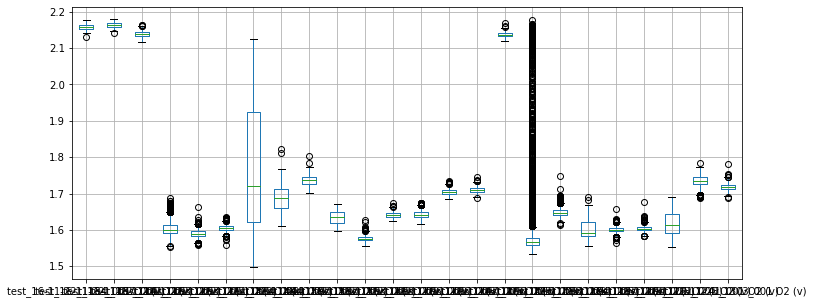

In [15]:
O2v[100:].boxplot(figsize=(12,5));

#### Signal translate

##### Store reference O2 value

In [16]:
Reference = O2v_stats['test_16-11-22_1137_001 O2 (v)'][1] # store mean of reference file
Referencesd = O2v_stats['test_16-11-22_1137_001 O2 (v)'][2] # store std of reference file

##### OTE calculation

In [17]:
yO2 = O2v[100:] / Reference * MFr_O2 #molar fraction in the off-gas
YO2 = yO2 / (1 - yO2) #molar ratio O2 inerts in the off-gas NOTE: here the CO2 is considered to be completely absorbed

OTE = (MR_O2_In - YO2) / MR_O2_In * 100
OTE_mean = pd.DataFrame(OTE.mean())
OTE_sd = pd.DataFrame(OTE.std())

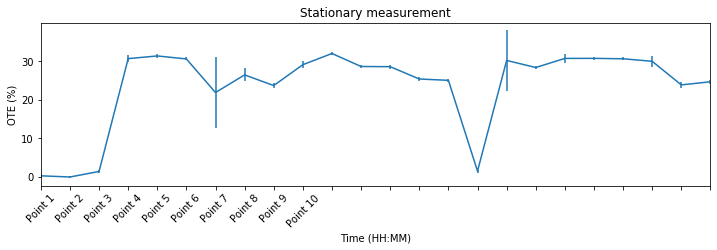

In [18]:
ax = OTE_mean.plot(title='Stationary measurement', figsize=(12,3), yerr=OTE_sd, legend=False, style='^');

ax.set_xlabel('Time (HH:MM)')
ax.set_ylabel('OTE (%)')

ax.set_xticks(range(len(file_names)))
ax.set_xticklabels(['Point 1', 'Point 2', 'Point 3', 'Point 4', 'Point 5', 
                    'Point 6', 'Point 7', 'Point 8', 'Point 9', 'Point 10'], 
                   rotation=45);
# plt.savefig('Stationary measurement')

##### Write stats to xlsx file

<div class="alert alert-success">
    <b> EXERCISE: </b> try to save your data adjusting the code below
</div>

In [16]:
# to which file to add the following dataframes
# writer = pd.ExcelWriter(path + file_names[0][5:7] + file_names[0][8:10] + file_names[0][11:13] + '_OldAn' + '.xlsx') 

# O2v.to_excel(writer, 'O2') #what to write to which sheet
# Flowv.to_excel(writer, 'Flow')
# O2v_stats.to_excel(writer, 'Stats O2')
# Flowv_stats.to_excel(writer, 'Stats Flow')
# OTE.to_excel(writer, 'OTE')
# OTE_mean.to_excel(writer, 'Stats OTE', header=['mean OTE'])
# OTE_sd.to_excel(writer, 'Stats OTE', startcol=3, header=['StDev OTE'])
# writer.save()